Q3. Bank Churn Classification Problem (33 points)

a.	Dataset Description: Banking is one of those traditional industries that has gone through a steady transformation over the past few decades. Yet, many banks today with a sizeable customer base are hoping to gain a competitive edge but have not tapped into the vast amounts of data they have, especially in solving one of the most acknowledged problems – customer churn (i.e., a customer leaving the bank). It is advantageous to banks to know what leads a client to leave the bank. Banks often use the customer churn rate as one of their key business metrics because the cost of retaining existing customers is far less than acquiring new ones, and meanwhile increasing customer retention can greatly increase profits. 
Churn prevention allows companies to develop different programs such as loyalty and retention programs to keep as many customers as possible. Following are the attributes of the dataset we will be working with.

i.	RowNumber (continuous) — corresponds to the record (row) number and has no effect on the output.

ii.	CustomerId  (categorical)— contains random values and has no effect on customer leaving the bank.

iii.	Surname  (categorical)— the surname of a customer has no impact on their decision to leave the bank

iv.	CreditScore  (continuous) — can influence customer churn, since a customer with a higher credit score is less likely to leave the bank.

v.	Geography (categorical) — a customer’s location can affect their decision to leave the bank.

vi.	Gender (categorical) — it’s interesting to explore whether gender plays a role in a customer leaving the bank.

vii.	Age (continuous) — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

viii.	Tenure (continuous) — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

ix.	Balance (continuous) — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

x.	NumOfProducts (continuous) — refers to the number of products that a customer has purchased through the bank.

xi.	HasCrCard (categorical) — denotes whether a customer has a credit card. This column is also relevant since people with a credit card are less likely to leave the bank.

xii.	IsActiveMember (categorical) — active customers are less likely to leave the bank.

xiii.	EstimatedSalary (continuous) — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

xiv.	Exited (Categorical) — whether or not the customer left the bank. (Target variable) 


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

**b. Data Loading / Preprocessing (10 points)**

i.	Loading (2 points)
1.	Load the data <BankChurn.csv> as a pandas dataframe using the `pd.read_csv()` function which returns a dataframe , store this value in a variable named ‘df’.


In [105]:
df = pd.read_csv('churn.csv')

2.	The resulting dataframe should have the shape (10000,14) indicating that there are 10000 instances and 14 columns. 

In [106]:
df.shape

(10000, 14)

3.	In this dataframe, currently you have 9 features which are the following: RowNumber, CustomerID, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary. Using the ‘pandas.dataframe.drop’ function to drop the RowNumber, CustomerID and Surname columns.

In [107]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [108]:
df.shape

(10000, 11)

4.	Using the ‘pandas.isnull()’ function check if there are any missing values in the dataframe and report this value (i.e., the number of missing values per column of the dataframe).

In [109]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

5.	Your task is to use feature columns to predict the target column (which is categorical in our case). This can be cast as a classification problem. 

6.	Create a dataframe X of features (by dropping the ‘Exited’ column from the original dataframe). Create a Pandas Series object of targets Y (by only considering the ‘Exited’ column from the original dataframe). Moving forward, we will be working with X and Y.

In [110]:
X = df.drop(['Exited'],axis=1)
Y = df['Exited']

In [111]:
X.shape

(10000, 10)

ii.	Data Visualization  (4 points)
1.	Visualize the distribution of the ‘Age’ and ‘CreditScore’ column using the ‘matplotlib.pyplot.hist’ function as two separate plots. Label the x-axis and the y-axis along with giving the plot a title and assign a bin size of 7. 

Text(0.5, 0, 'Age')

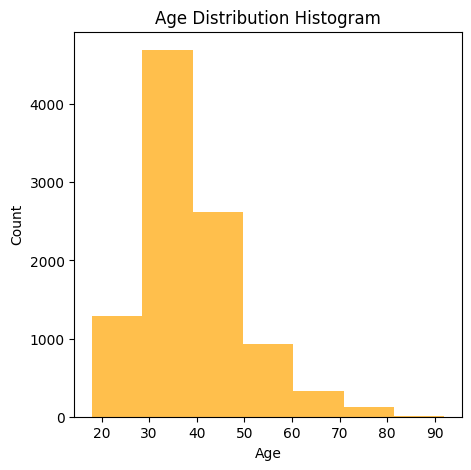

In [112]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(X['Age'],bins = 7,alpha = 0.7, color = 'orange')
ax.set_title('Age Distribution Histogram')
ax.set_ylabel('Count')
ax.set_xlabel('Age')

Text(0.5, 0, 'CreditScore')

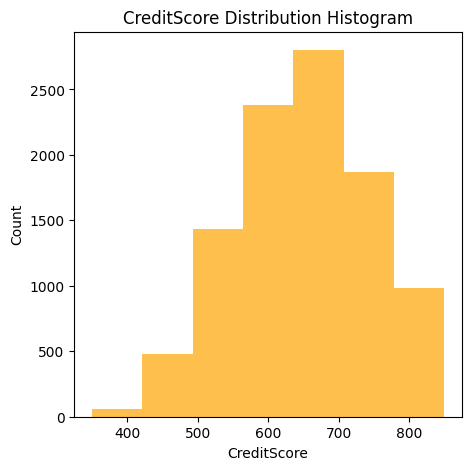

In [113]:
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(X['CreditScore'],bins = 7,alpha = 0.7, color = 'orange')
ax.set_title('CreditScore Distribution Histogram')
ax.set_ylabel('Count')
ax.set_xlabel('CreditScore')

a.	What are the respective mean values of these two features (use the pandas.DataFrame.mean() function)?

In [114]:
age_mean = round(X['Age'].mean(),2)
creditscore_mean = round(X['CreditScore'].mean(),2)
print("The mean value of Age is {} years and CreditScore is ${}".format(age_mean,creditscore_mean))

The mean value of Age is 38.92 years and CreditScore is $650.53


b.	What is the respective standard deviation of these two features (use the pandas.DataFrame.std() function)? 

In [115]:
age_std = round(X['Age'].std(),2)
creditscore_std = round(X['CreditScore'].std(),2)
print("The Standard deviation of Age is {} and Creditscore is ${}".format(age_std,creditscore_std))

The Standard deviation of Age is 10.49 and Creditscore is $96.65


2.	Only for this question use the dataframe consisting of the target variable (initialized as ‘df’). Using matplotlib visualize the number of males and females in each country who are active members and not active members. (Visualize this using a barchart. You will need to use the ‘Gender’, ‘Geography’ and ‘IsActiveMember’ features for this question). Visualize these graphs on two separate plots with respect to their active status. To create a barchart using matplotlib use the ‘matplotlib.pyplot.bar()’ function. Also label the x-axis, y-axis and give the plots a title. 

In [116]:
df.shape

(10000, 11)

In [117]:
active = df.loc[df['IsActiveMember'] == 1]
active = active[['Gender','Geography']].reset_index(drop=True)
inactive = df.loc[df['IsActiveMember'] == 0]
inactive = inactive[['Gender','Geography']].reset_index(drop=True)

<AxesSubplot: xlabel='Geography'>

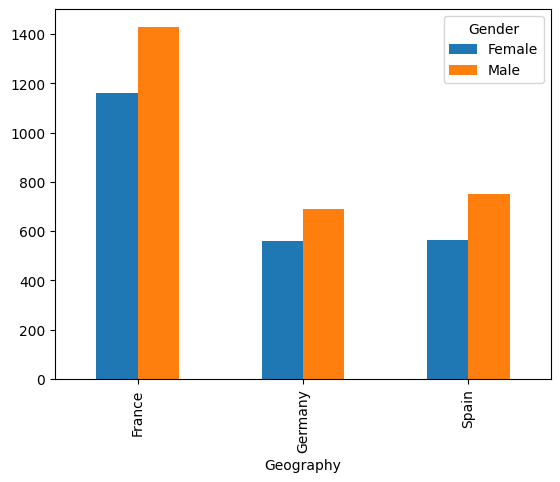

In [118]:
cta =pd.crosstab(active['Geography'], active['Gender'])
cta.plot(kind='bar')

In [119]:
cta

Gender,Female,Male
Geography,,
France,1162,1429
Germany,559,689
Spain,563,749


<AxesSubplot: xlabel='Geography'>

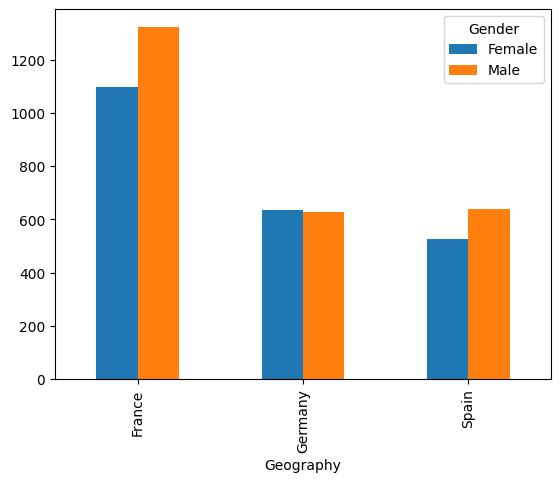

In [120]:
ctia =pd.crosstab(inactive['Geography'], inactive['Gender'])
ctia.plot(kind='bar')

In [121]:
ctia

Gender,Female,Male
Geography,,
France,1099,1324
Germany,634,627
Spain,526,639


a.	How many males are from France and are active members?

In [122]:
g = active.loc[active['Geography']=='France']
print("{} males are from France and are active members.".format((g['Gender']).value_counts()['Male']))

1429 males are from France and are active members.


b.	How many females are from Spain and are active members?

In [123]:
g = active.loc[active['Geography']=='Spain']
print("{} females are from Spain and are active members.".format((g['Gender']).value_counts()['Female']))

563 females are from Spain and are active members.


c.	How many males are from France or Germany who are not active members?

In [124]:
g1 = inactive.loc[inactive['Geography']=='France']
g2 = inactive.loc[inactive['Geography']=='Germany']
tmia = (g1['Gender']).value_counts()['Male'] + (g2['Gender']).value_counts()['Male']
tmia
print("{} males are from France or Germany who are not active members.".format(tmia))

1951 males are from France or Germany who are not active members.


3.	Using the target variable in Y plot a bar chart showing the distribution of the ‘Exited’ column (To create a barchart using matplotlib use the ‘matplotlib.pyplot.bar()’ function).

In [125]:
se = pd.crosstab(Y,Y)
se

Exited,0,1
Exited,,
0,7963,0
1,0,2037


<AxesSubplot: xlabel='Exited'>

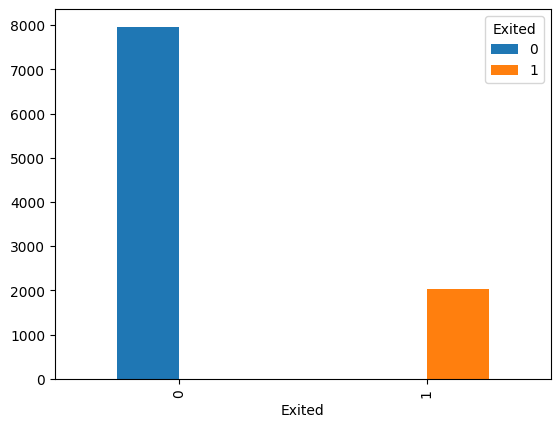

In [126]:
se.plot(kind='bar')

a.	What can be said about this distribution (specifically keeping in mind this distribution represents the target variable) will this have an impact on the results of the classification model? 

**Ans2.b.ii.3.a:** We can say about this distribution will have a more impact on the results of the classification model towards the class 0 of Exited rather than class 1 of Exited. 

4.	So far you should have successfully been able to load, preprocess and visualize your data. Now, use the ‘pd.get_dummies()’ function to convert categorical data into dummy variables (‘Gender’ and ‘Geography’). (Perform this only on X).

a.	What is the shape of X?

In [127]:
X = pd.get_dummies(data=X, columns=['Gender','Geography'])

In [128]:
X.shape

(10000, 13)

iii.	Data Splitting (1 point)

1.	Split data into training and test sets using the sklearn ‘train_test_split() function in a 80:20 ratio. The result of your data split should be X_train, X_test, y_train, y_test. (Respectively your training features, testing features, training targets and testing target arrays).

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

iv.	Data Scaling (3 points)

1.	Employ the ‘MinMaxScaler’  function on the continuous attributes in X_train. Employ the ‘fit_transform()’ function of the scaler to retrieve the new (scaled) version of the training data (i.e., fit_transform() should be run on `X_train`). Store the result in X_train again.

In [130]:
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)

In [131]:
X_train

array([[0.672     , 0.18918919, 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.564     , 0.32432432, 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.418     , 0.08108108, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.77      , 0.27027027, 0.1       , ..., 1.        , 0.        ,
        0.        ],
       [0.634     , 0.33783784, 0.8       , ..., 1.        , 0.        ,
        0.        ],
       [0.694     , 0.44594595, 0.1       , ..., 0.        , 1.        ,
        0.        ]])

2.	Scale the X_test data using the scaler you have just fit, this time using the `transform()` function. Note: store the scaled values back into X_test.  At the end of this step, you must have X_train, X_test, scaled according to the MinMaxScaler.

In [132]:
X_test = minmax.transform(X_test)

**c. Modelling (10 points)**

i.	(2 points) Modelling (Model Instantiation / Training) using Logistic Regression classifier

1.	Employ the Logistic Regression classifier from sklearn and instantiate the model. Label this model as ‘model_lr’

In [133]:
model_1_lr = LogisticRegression()

2.	Once instantiated, `fit()` the model using the scaled X_train, y_train data.

In [134]:
model_1_lr.fit(X_train, y_train)

LogisticRegression()

3.	Employ the `predict()` function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_lr’.

In [135]:
y_pred_lr = model_1_lr.predict(X_test)

4.	Employ the ‘accuracy_score ’ function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the Logistic Regression model.

In [136]:
print("Accuracy: ",accuracy_score(y_test,y_pred_lr))

Accuracy:  0.8125


ii.	(2 points) Modelling (Model Instantiation / Training) using Support Vector Machine Classifier

1.	Employ the Support Vector Machine (SVM) classifier from sklearn and instantiate the model. Label this model as ‘model_2_svm’

In [137]:
model_2_svm = SVC()

2.	Once instantiated, ‘fit()’ the model using the scaled X_train, y_train data.

In [138]:
model_2_svm.fit(X_train,y_train)

SVC()

3.	Employ the ‘predict()’ function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_svm’. 

In [139]:
y_pred_svm = model_2_svm.predict(X_test)

4.	Employ the ‘accuracy_score’ function (‘sklearn.metrics.accuracy()’ function) by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the SVM model. 

In [140]:
print("Accuracy: ", accuracy_score(y_test,y_pred_svm))

Accuracy:  0.841


**iii. (2 points) Modeling Logistic Regression Classifier on a balanced dataset**

1.	Employ Synthetic Minority Oversampling on X_train and y_train. To use SMOTE you will have to install the imbalanced-learn library, this can either be down by executing the following command ‘pip install -U imbalanced-learn’ command ‘conda install -c conda-forage imbalanced-learn’ command for the Anaconda Cloud platform. (For more information click the following link: https://imbalanced-learn.org/stable/install.html). 
Import the ‘SMOTE’ function from the ‘imblearn.over_sampling’. Use the ‘smote.refit_resample()’ function on X_train and y_train using its default parameters. Store them in X_train_smote, y_train_smote. - Be careful to employ SMOTE ONLY on the training data and not on the full dataset because that can cause inadvertent “data leakage” (please see: https://arxiv.org/pdf/2107.00079.pdf for details) . 

In [141]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

2.	Employ a new Logistic Regression classifier from sklearn and instantiate the model. Label this model as ‘model_3_smote_lr’

In [142]:
model_3_smote_lr = LogisticRegression()

3.	Once instantiated, ‘fit()’ the model using the balanced X_train_smote, y_train_smote data.

In [143]:
model_3_smote_lr.fit(X_train_smote,y_train_smote)

LogisticRegression()

4.	Employ the ‘predict()’ function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_smote_lr’. 

In [144]:
y_pred_smote_lr = model_3_smote_lr.predict(X_test)

5.	Employ the ‘accuracy_score’ function by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the new Logistic Regression model.

In [145]:
print("Accuracy: ", accuracy_score(y_test,y_pred_smote_lr))

Accuracy:  0.7225


a.	What is your initial observation of the accuracy of model_3_smote_lr vs. accuracy of model_1_lr? What could be the reasoning for (any possible) change in accuracy?

**Ans:** The initial observation of the accuracy of model_3_smote_lr vs accuracy of model_1_lr is that accuracy of first model_1_lr was 0.8125 but now the accuracy of third model_3_smote_lr is 0.725. Here we can clearly see the decrease in change of accuracy. The reason for the change in accuracy because it may had makes the data more imbalanced which is why it the model is getting low accuracy score.

**iv. (2 points) Modeling SVM on a balanced dataset**

1.	Employ Synthetic Minority Oversampling on X_train and y_train. Import the ‘SMOTE’ function from the ‘imblearn.over_sampling’. Use the ‘smote.refit_resample()’ function on X_train and y_train. Store them in X_train_smote, y_train_smote.

In [146]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

2.	Employ a new SVM classifier from sklearn and instantiate the model. Label this model as ‘model_4_smote_svm’

In [147]:
model_4_smote_svm = SVC()

3. Once instantiated, ‘fit()’ the model using the balanced X_train_smote, y_train_smote data.

In [148]:
model_4_smote_svm.fit(X_train_smote,y_train_smote)

SVC()

4.	Employ the ‘predict()’ function to obtain predictions on X_test and store this in a variable labeled as ‘y_pred_smote_svm’. 

In [149]:
y_pred_smote_svm = model_4_smote_svm.predict(X_test)

5.	Employ the ‘accuracy_score’ function (‘sklearn.metrics.accuracy()’ function) by using the ‘y_pred_lr’ and ‘y_test’ variables as the functions parameters and print the accuracy of the new SVM model.

In [150]:
print("Accuracy: ", accuracy_score(y_test,y_pred_smote_svm))

Accuracy:  0.767


a.	What is your initial observation of the accuracy of model_4_smote_svm vs. accuracy of model_2_svm? What could be the reasoning for (any possible) change in accuracy?

**Ans3.e.5.a:** The initial observation of the accuracy of model_4_smote_svm is lower than model_2_svm accuracy. The reason for the change in accuracy because it may had makes the data more imbalanced which is why it the model is getting low accuracy score.

**v. (2 points) Modeling Grid Search Parameter Selection for SVM**

1.	We will now be reverting to our X_train and y_train data. Initialize a variable labeled as ‘param_grid’ storing the following: {"gamma": [0.001, 0.01, 0.1], "C": [1,10,100,1000,10000]}.

In [151]:
param_grid = {"gamma": [0.001, 0.01, 0.1], "C": [1,10,100,1000,10000]}

2.	Employ the gridsearchCV function and initialize the following parameters: estimator = SVC(), param_grid = param_grid, cv=5, verbose =1, scoring = ‘accuracy’

In [152]:
clf = GridSearchCV(estimator=SVC(),param_grid=param_grid,cv=5,verbose=1,scoring='accuracy')

3.	Once instantiated, ‘fit()’ the model using the X_train_smote, y_train_smote data.

In [153]:
clf.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [0.001, 0.01, 0.1]},
             scoring='accuracy', verbose=1)

4.	Print the best paramaters using the ‘best_params_’ attribute and print the mean cross validated score of the best estimator (hint use the ‘best_score_’ attribute).

In [154]:
print("The best parameters: ",clf.best_params_)
print("The mean cross validated score: ",clf.best_score_)

The best parameters:  {'C': 10000, 'gamma': 0.01}
The mean cross validated score:  0.8557499999999999


5.	Employ the ‘score’ function by using the ‘X_test’ and ‘y_test’ variables as the functions parameters and print the accuracy of the new gridsearch SVM model.SVM model.

In [155]:
clf.score(X_test,y_test)

0.8575

In [156]:
y_pred_clf = clf.predict(X_test)

In [157]:
print("Accuracy: ",accuracy_score(y_test, y_pred_clf))

Accuracy:  0.8575


**d. Evaluation (5 points)**

i.	(2 points) Calculate F1 Score, Precision, Recall, Accuracy (All on the test set X_test, y_test)

1.	Employ the `classification_report()` function from sklearn.metrics to report the precision recall, f1 score and accuracy for each class for the first four models (parts c.i – c.iv). 

In [158]:
print("Model 1 Results")
print(classification_report(y_test,y_pred_lr,target_names=['Class 0','Class 1']))
print("Model 2 Results")
print(classification_report(y_test,y_pred_svm,target_names=['Class 0','Class 1']))
print("Model 3 Results")
print(classification_report(y_test,y_pred_smote_lr,target_names=['Class 0','Class 1']))
print("Model 4 Results")
print(classification_report(y_test,y_pred_smote_svm,target_names=['Class 0','Class 1']))


Model 1 Results
              precision    recall  f1-score   support

     Class 0       0.83      0.96      0.89      1607
     Class 1       0.57      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Model 2 Results
              precision    recall  f1-score   support

     Class 0       0.84      0.99      0.91      1607
     Class 1       0.85      0.23      0.36       393

    accuracy                           0.84      2000
   macro avg       0.85      0.61      0.64      2000
weighted avg       0.84      0.84      0.80      2000

Model 3 Results
              precision    recall  f1-score   support

     Class 0       0.91      0.73      0.81      1607
     Class 1       0.39      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81   

ii.	(2 points) Visualize a confusion matrix for the first four models

1.	Employ the `confusion_matrix()` function from sklearn.metrics to report the confusion matrix results.

In [159]:
print("Confusion Matrix for Model 1")
print(confusion_matrix(y_test, y_pred_lr))
print("Confusion Matrix for Model 2")
print(confusion_matrix(y_test, y_pred_svm))
print("Confusion Matrix for Model 3")
print(confusion_matrix(y_test, y_pred_smote_lr))
print("Confusion Matrix for Model 4")
print(confusion_matrix(y_test, y_pred_smote_svm))

Confusion Matrix for Model 1
[[1550   57]
 [ 318   75]]
Confusion Matrix for Model 2
[[1591   16]
 [ 302   91]]
Confusion Matrix for Model 3
[[1167  440]
 [ 115  278]]
Confusion Matrix for Model 4
[[1263  344]
 [ 122  271]]


2.	Report the False Negative and False Positive values for model_1_lr.

In [160]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_lr).ravel()
print("False Negative {} and False Positive {} values for model_1_lr".format(fn,fp))

False Negative 318 and False Positive 57 values for model_1_lr


iii. (1 point) Report the best F1 score of the grid search implemented in the fifth model (part c.v). Also report the best parameters from the grid search on the training set. 

In [161]:
print("The best F1 score of the grid seach implemented in the fifth model (part c.v) is ",f1_score(y_test,y_pred_clf))
print("The best parameters from the grid search on the training set is ",clf.best_params_)

The best F1 score of the grid seach implemented in the fifth model (part c.v) is  0.5111492281303602
The best parameters from the grid search on the training set is  {'C': 10000, 'gamma': 0.01}


**e. Discussion (8 points)**

i.	(2 points) Compare the performance of the Logistic Regression (model_1_lr) classifier and the SVM classifier (model_2_svm). Using the classification reports which model performs better? Mention the specific numbers (i.e., from your results calculating the precision, recall, F1 score) in a table. 

In [162]:
print("Model 1 Results")
print(classification_report(y_test,y_pred_lr,target_names=['Class 0','Class 1']))
print("Model 2 Results")
print(classification_report(y_test,y_pred_svm,target_names=['Class 0','Class 1']))

Model 1 Results
              precision    recall  f1-score   support

     Class 0       0.83      0.96      0.89      1607
     Class 1       0.57      0.19      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Model 2 Results
              precision    recall  f1-score   support

     Class 0       0.84      0.99      0.91      1607
     Class 1       0.85      0.23      0.36       393

    accuracy                           0.84      2000
   macro avg       0.85      0.61      0.64      2000
weighted avg       0.84      0.84      0.80      2000



| Model Name  | Class  | Precision  | Recall  | F1  |
|---|---|---|---|---|
| model_1_lr  | 0  | 0.83  | 0.96  | 0.89  |
| model_1_lr  | 1  | 0.57  | 0.19  | 0.29  |
| model_2_svm  | 0  | 0.84  | 0.99  | 0.91  |
| model_2_svm  | 1  | 0.85  | 0.23  | 0.36  |

Using classification reports SVM classifier (model_2_svm) model preforms better than Logistic Regression (model_1_lr) classifier

ii.	(2 points) Compare the results between the models prior to SMOTE and after. Use a combination of the classification report and the confusion matrix to emphasize your observation. (model_1_lr vs model_3_lr and model_2_svm vs model_4_svm)

In [163]:
print("Model 3 Results")
print(classification_report(y_test,y_pred_smote_lr,target_names=['Class 0','Class 1']))
print("Model 4 Results")
print(classification_report(y_test,y_pred_smote_svm,target_names=['Class 0','Class 1']))

Model 3 Results
              precision    recall  f1-score   support

     Class 0       0.91      0.73      0.81      1607
     Class 1       0.39      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.75      2000

Model 4 Results
              precision    recall  f1-score   support

     Class 0       0.91      0.79      0.84      1607
     Class 1       0.44      0.69      0.54       393

    accuracy                           0.77      2000
   macro avg       0.68      0.74      0.69      2000
weighted avg       0.82      0.77      0.78      2000



In [164]:
print("Confusion Matrix for Model 3")
print(confusion_matrix(y_test, y_pred_smote_lr))
print("Confusion Matrix for Model 4")
print(confusion_matrix(y_test, y_pred_smote_svm))

Confusion Matrix for Model 3
[[1167  440]
 [ 115  278]]
Confusion Matrix for Model 4
[[1263  344]
 [ 122  271]]


| Model Name  | Class  | Precision  | Recall  | F1  |
|---|---|---|---|---|
| model_3_smote_lr  | 0  | 0.91  | 0.73  | 0.81  |
| model_3_smote_lr  | 1  | 0.39  | 0.71  | 0.50  |
| model_4_smote_svm  | 0  | 0.91  | 0.79  | 0.84  |
| model_4_smote_svm  | 1  | 0.44  | 0.69  | 0.54  |

**Ans3.e.ii:** By comparing the results between the models prior to SMOTE and after we can say that the model_1_lr performs better than model_3_smote_lr and model_2_svm performs better than model_4_smote_svm.

iii. (2 points) Discuss the advantages and disadvantages between oversampling and under-sampling. Use the following article to help you formulate your answer and reasoning. (https://www.mastersindatascience.org/learning/statistics-data-science/undersampling/) 

**Ans3.e.iii:** Oversampling is appropriate when data scientists do not have enough information. <br>
Oversampling methods duplicate or create new synthetic examples in the minority class. <br>
Oversampling is basically upsampling the minority class to make it almost equal in size with respect to the majority class. <br>
Undersampling is appropriate when there is plenty of data for an accurate analysis. <br>
Undersampling methods delete or merge examples in the majority class. <br>
Undersampling is basically downsampling the majority class to make it (almost) equal in size with respect to the minority class.

iv.	(2 points) From the results of the grid-search, comment on importance of the gamma parameter on SVM performance. What effect will the gamma value have if it is too big or too small?

**Ans3.e.iv** The results of the grid-search, the gamma paramenter which we get 0.01. The model accuracy lowers with the increasing value of gamma. The lower value of gamma will mean that the data points have very high radius of influence. That's why gamma parameter plays important role for SVM performance. The gamma parameter defines how far the influence of a single training example reaches, with small values meaning 'far' and big values meaning 'close'. Also, big value of gamma will mean that radius of influence is limited to only support vectors. This would essentially mean that the model tries and overfit.